In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV 
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report,accuracy_score,confusion_matrix
from sklearn.feature_selection import mutual_info_classif

from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB

from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression,Lasso,LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.multioutput import MultiOutputRegressor

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error,r2_score


import sklearn.gaussian_process as gp
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError

from tensorflow.keras.optimizers import Adam

In [2]:
Data = pd.read_csv("new_data.csv")

In [3]:
Data.describe()

,Unnamed: 0,Batch,Class,Fresh_Wt,Head_Wt,Radial_Dia,Polar_Dia,Leaf_Ar,Quantity,Planting_Wk,Plant2check,Plant2Flight,Flight2check,Growth_on_Check,Wind Speed [avg],Air Temperature [avg],Relative Humidity [avg],Dew Point [avg],ET0 [result]
count,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000,2990.0,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000
mean,1699.767893,581.310368,2.969231,571.727636,243.033779,110.073913,102.177592,482.211371,211120.318395,26.270234,39.958528,32.101338,7.857191,0.0,2.383039,17.038098,79.880781,12.783126,3.581326
std,972.120943,78.480309,1.438277,303.158959,203.967286,41.891968,34.341985,198.736504,79556.180817,4.187782,5.554103,8.596028,7.572335,0.0,0.263823,1.649312,2.774804,1.764242,0.376760
min,75.000000,402.000000,1.000000,0.632000,0.000000,0.000000,0.000000,93.000000,72912.000000,15.000000,29.000000,6.000000,0.000000,0.0,1.944772,10.819219,74.723535,5.989839,2.672380
25%,921.250000,517.000000,2.000000,319.000000,49.000000,80.000000,80.000000,335.000000,133056.000000,23.000000,36.000000,31.000000,0.000000,0.0,2.111083,16.492424,77.524666,12.504162,3.403030
50%,1677.500000,607.000000,3.000000,571.000000,221.000000,125.000000,110.000000,460.000000,220752.000000,27.000000,40.000000,33.000000,6.000000,0.0,2.422317,17.136189,79.582148,12.969142,3.681815
75%,2426.750000,647.000000,4.000000,795.000000,393.750000,142.000000,130.000000,594.750000,300720.000000,30.000000,44.000000,37.000000,12.000000,0.0,2.589671,18.431403,81.357895,13.912121,3.906508
max,3804.000000,693.000000,5.000000,1978.000000,998.000000,185.000000,178.000000,1276.000000,398328.000000,32.000000,54.000000,48.000000,24.000000,0.0,3.235516,19.115538,86.385590,14.631579,4.106061


In [4]:
Data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [5]:
Data.drop(["Plant_Date","Check Date","Flight Date","Plant2check","Growth_on_Check"],axis=1,inplace=True)

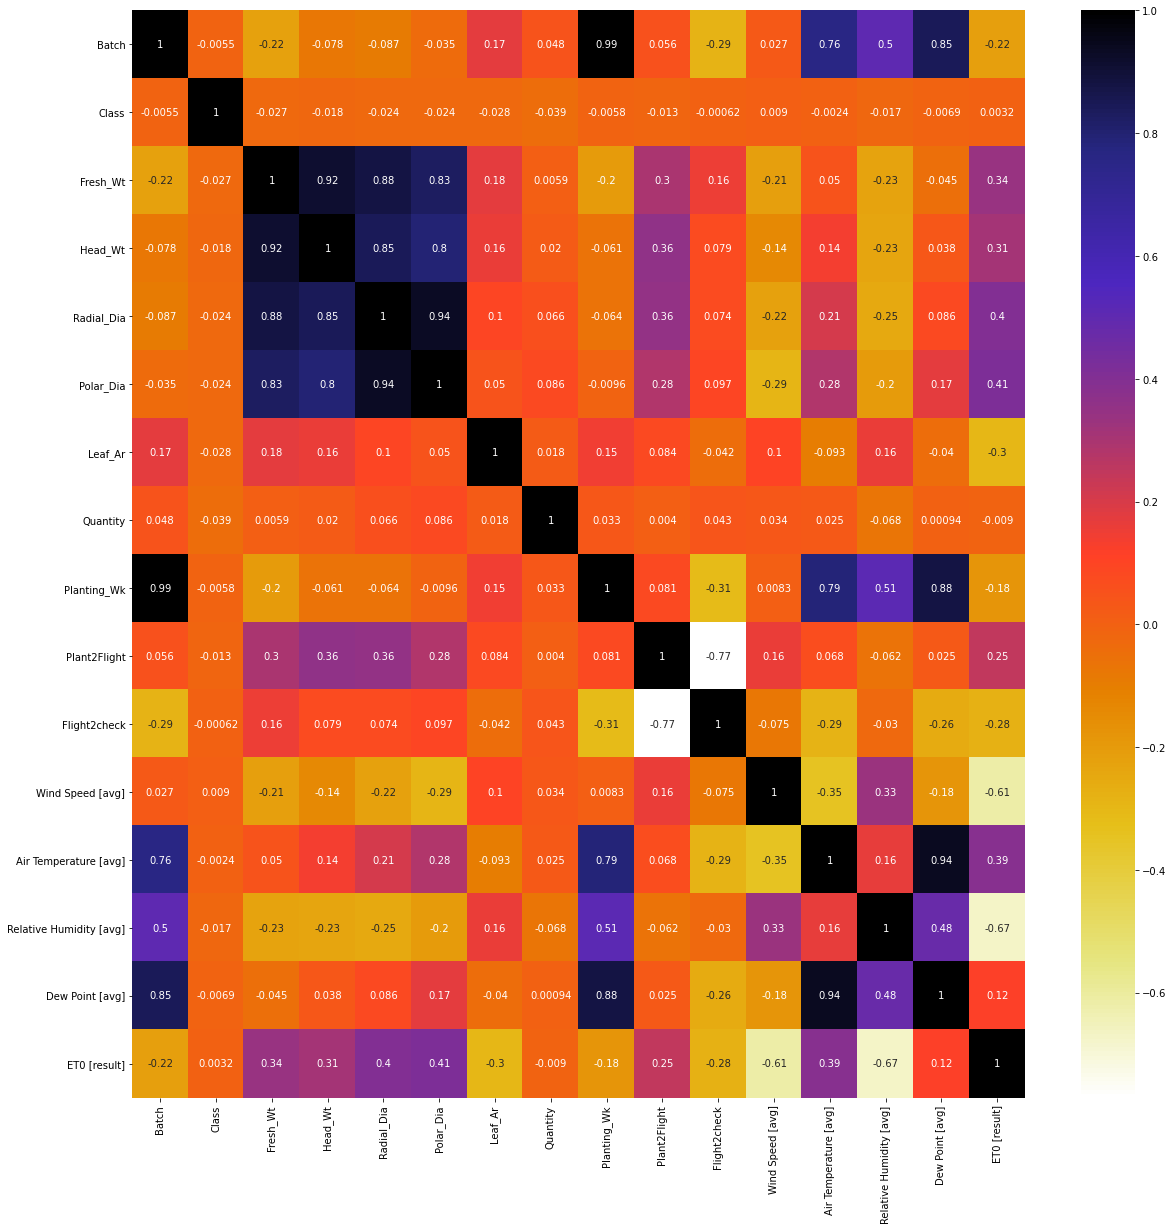

In [6]:
plt.figure(figsize=(20,20))
cor=Data.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [7]:

pd.pandas.set_option("display.max_columns",None)
pd.pandas.set_option("display.max_rows",None)
Data.drop(["Batch",'Planting_Wk','Air Temperature [avg]'],axis=1,inplace=True) # these features are highly co-related

In [9]:
Data.columns

Index(['Class', 'Fresh_Wt', 'Head_Wt', 'Radial_Dia', 'Polar_Dia', 'Leaf_Ar',
       'Quantity', 'Plant2Flight', 'Flight2check', 'Wind Speed [avg]',
       'Relative Humidity [avg]', 'Dew Point [avg]', 'ET0 [result]'],
      dtype='object')

In [10]:
label = ["Head_Wt","Radial_Dia","Polar_Dia","Fresh_Wt"]

In [11]:
x = Data.drop(label,axis=1)
y = Data[label]

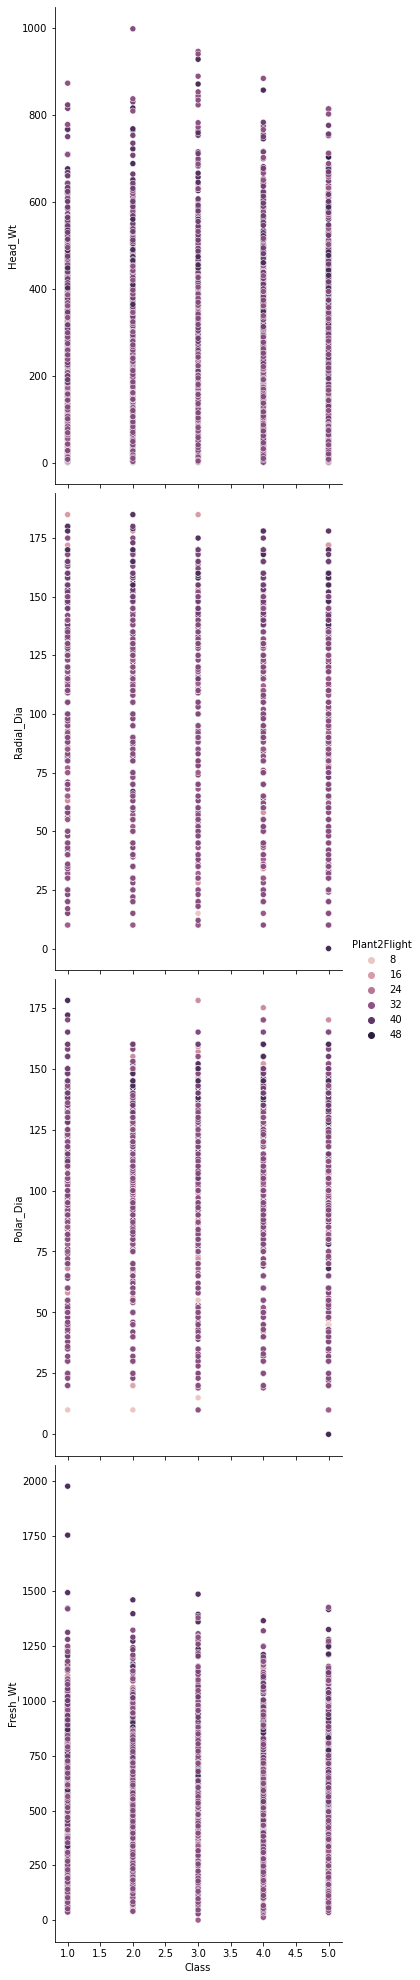

In [12]:

sns.pairplot(Data,x_vars=['Class'],y_vars=label,height=7,aspect=0.7)

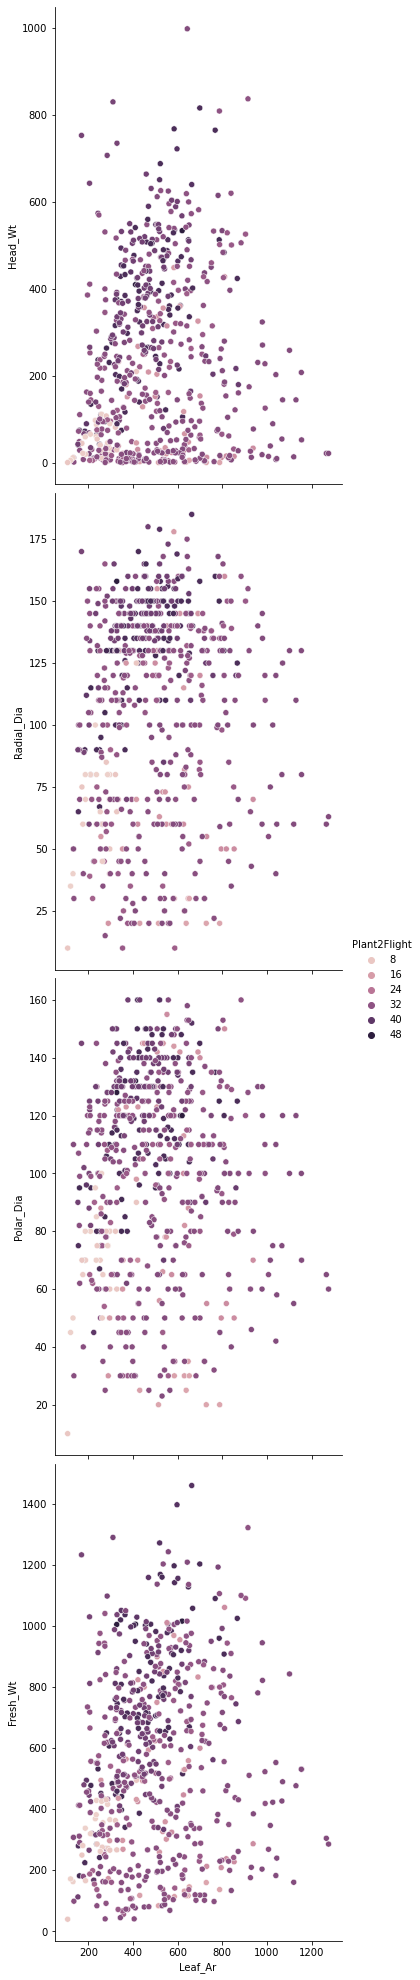

In [13]:


sns.pairplot(Data.loc[Data.Class == 2],x_vars=['Leaf_Ar'],y_vars=label,height=7,aspect=0.7)

In [14]:
#sns.pairplot(Data,x_vars=label,y_vars=['Planting_Wk'],height=7,aspect=0.7)

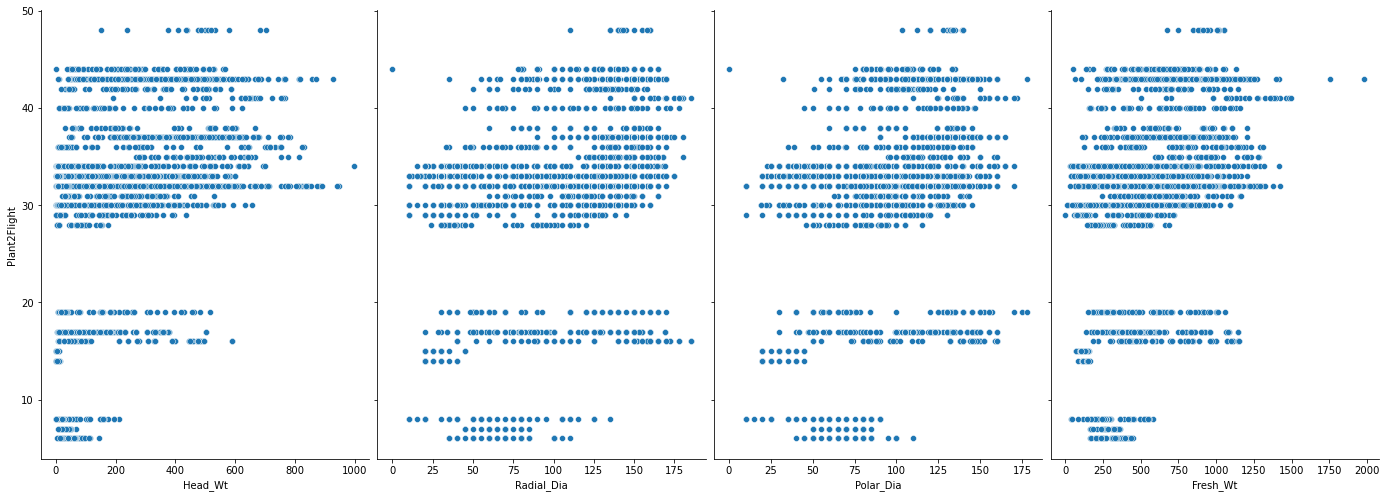

In [15]:
sns.pairplot(Data,x_vars=label,y_vars=['Plant2Flight'],height=7,aspect=0.7)

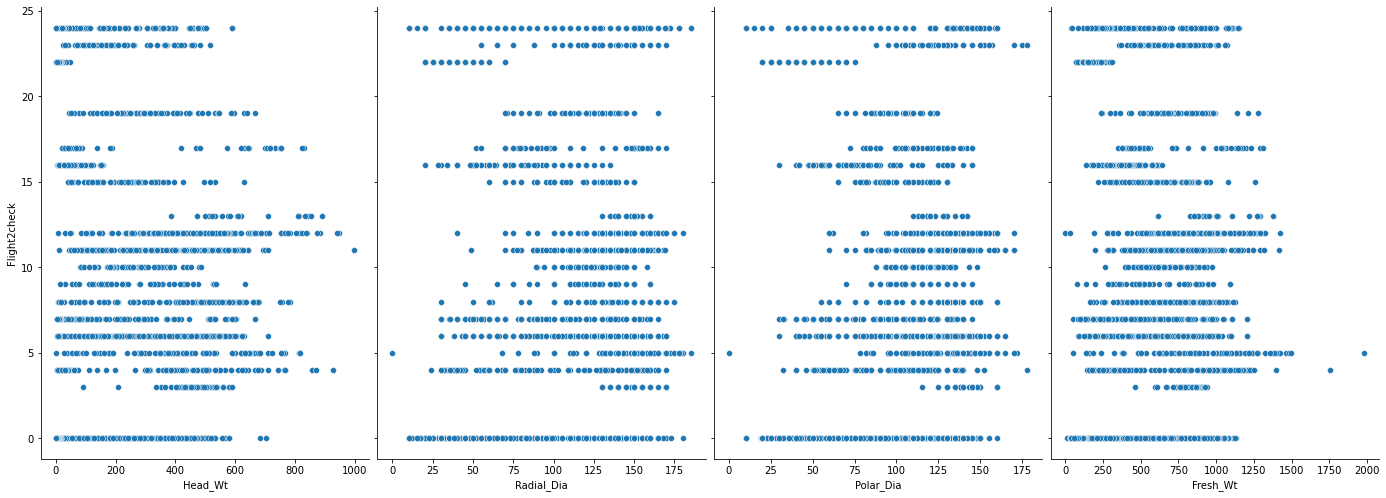

In [16]:
sns.pairplot(Data,x_vars=label,y_vars=['Flight2check'],height=7,aspect=0.7)

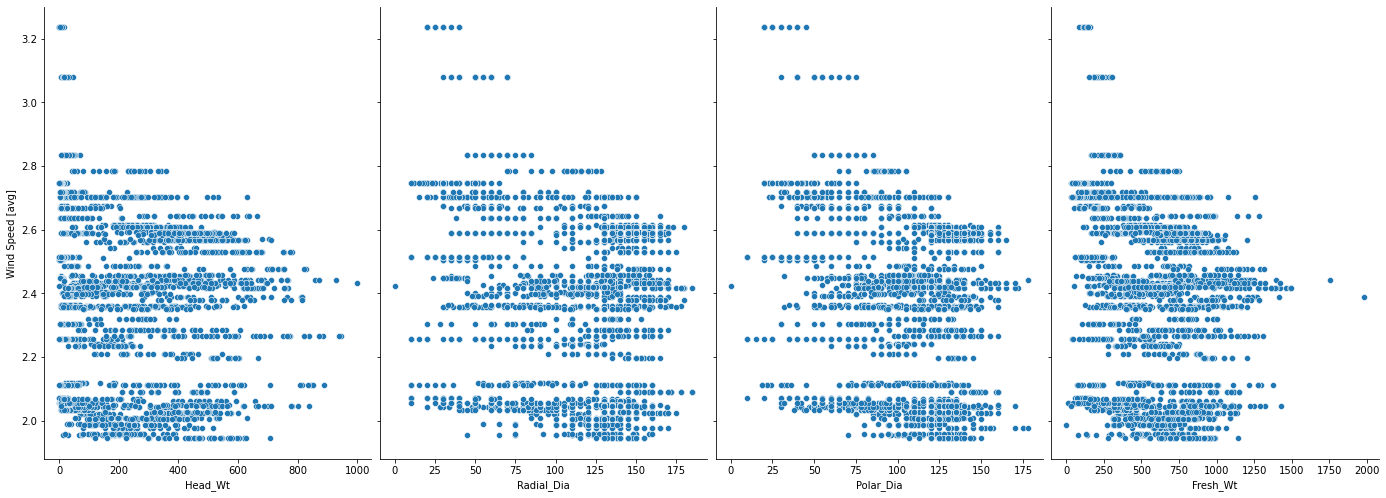

In [17]:
sns.pairplot(Data,x_vars=label,y_vars=['Wind Speed [avg]'],height=7,aspect=0.7)

KeyError: "['Air Temperature [avg]'] not in index"

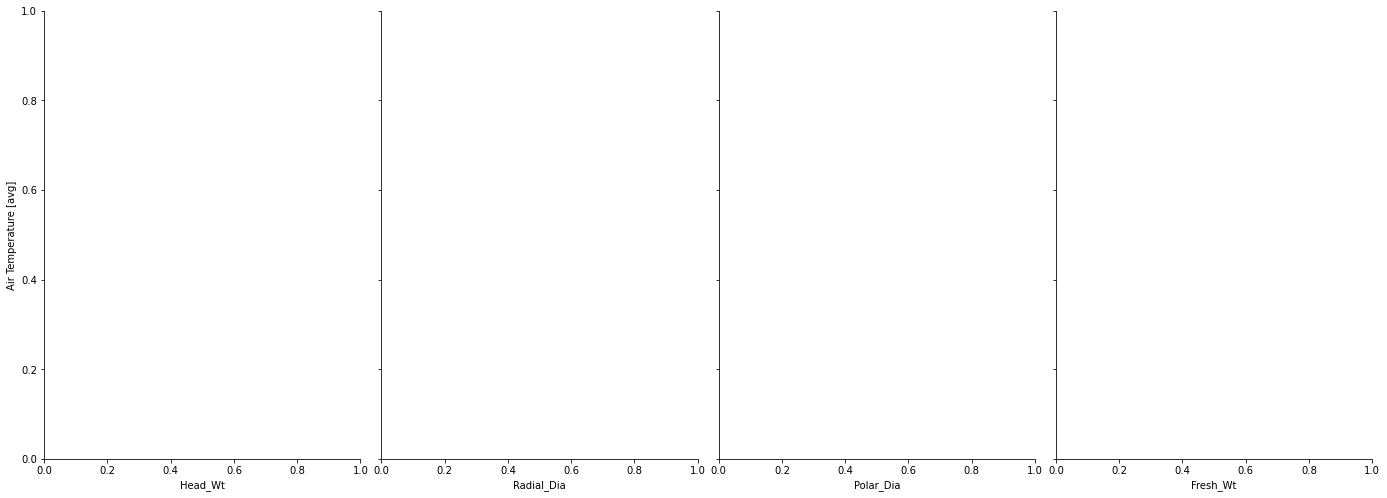

In [18]:
#sns.pairplot(Data,x_vars=label,y_vars=['Air Temperature [avg]'],height=7,aspect=0.7)

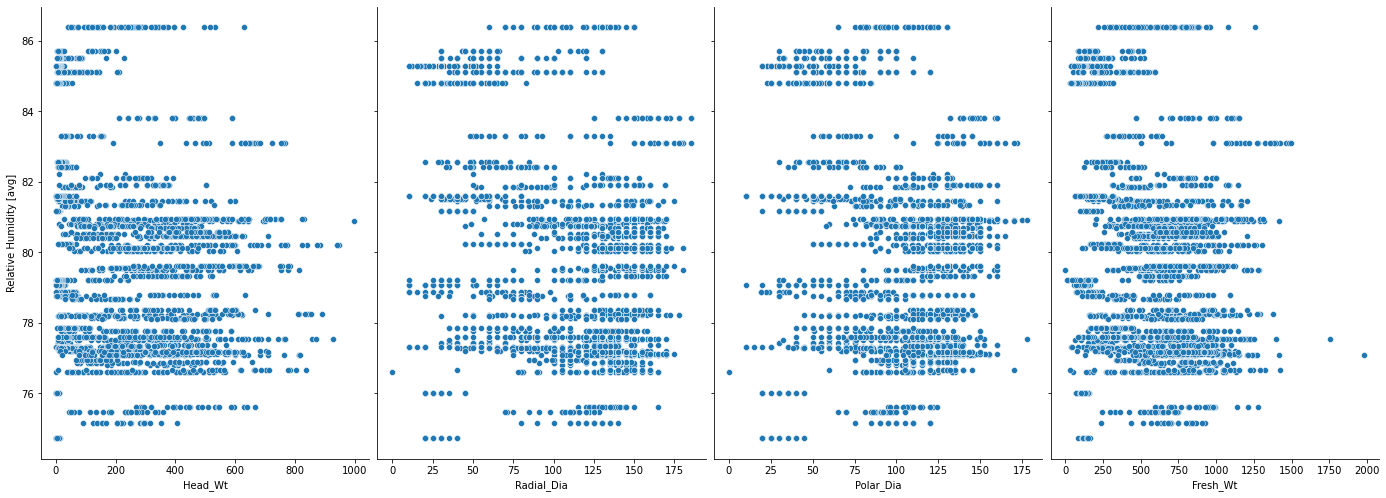

In [24]:
sns.pairplot(Data,x_vars=label,y_vars=['Relative Humidity [avg]'],height=7,aspect=0.7)

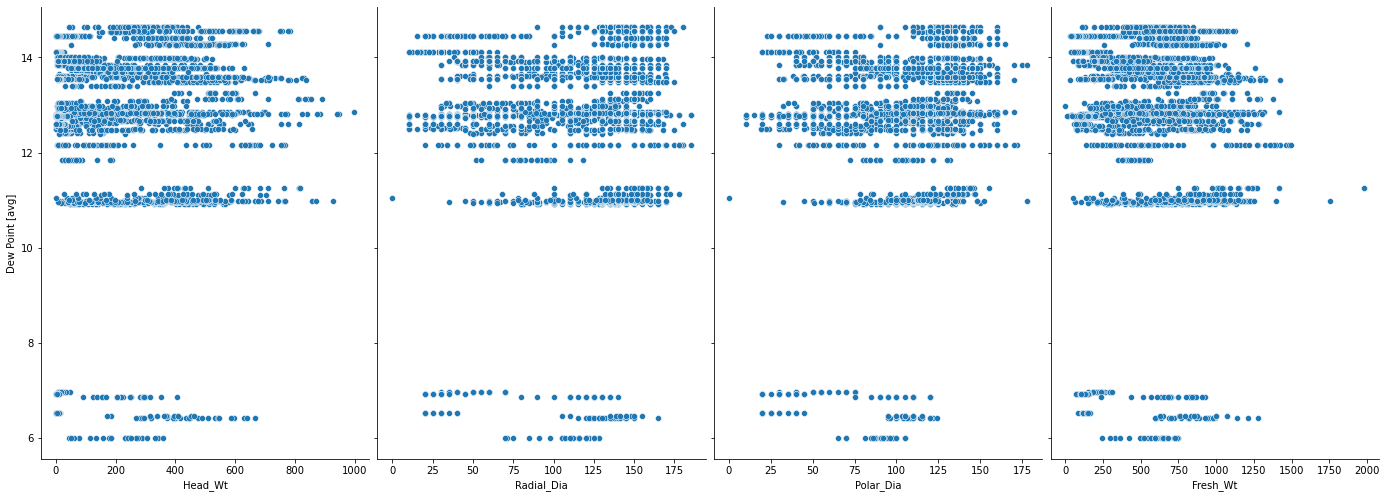

In [25]:
sns.pairplot(Data,x_vars=label,y_vars=['Dew Point [avg]'],height=7,aspect=0.7)

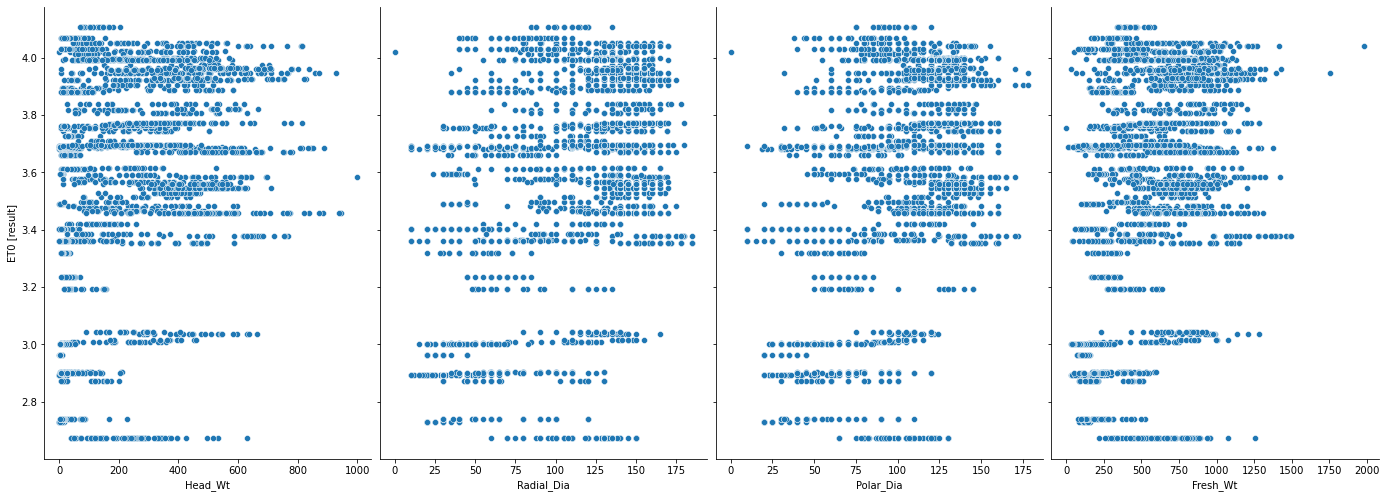

In [26]:
sns.pairplot(Data,x_vars=label,y_vars=['ET0 [result]'],height=7,aspect=0.7)

In [27]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = StandardScaler()                    #MinMaxScaler(feature_range=(0,1))
#value = processing
#array = value.to_numpy()
#array= array.reshape(-1,1)

x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

In [28]:

#x_data,x_validation,y_data,y_validation = train_test_split(x,y, train_size=0.9, random_state=10)
x_train,x_test,y_train,y_test=train_test_split(x,y, train_size=0.7, random_state=42)
print("++++++++++++++++++++ Data Splitting +++++++++++++++++++++++")
print("\n\tSplit Ratio (Train : Test): {}% : {}%\n".format(70,30))
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
print("\n\t      Records under Train Set: {}".format(len(x_train)))
print("\n\t      Records under Test Set: {}\n".format(len(x_test)))  #n_estimators= 10, random_state=5,max_features='log2',bootstrap=True
print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

Algorithms=[
    LinearRegression(),
    RandomForestRegressor(n_estimators= 200, random_state=5,max_features='auto',bootstrap=True),
    MLPRegressor(hidden_layer_sizes=(2500,100,),max_iter=3000,momentum=0.4),
    gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=12, alpha=0.1, normalize_y=True),
    KNeighborsRegressor(n_neighbors=6),
    
    
]  # we are trying to use 3 regression algorithms here


Names=["Linear Regression","Random Forest Regressor","MLP Regressor","gauss","KNN"]

mean_square={} # the metrics that we are going to use is mean_square and r2_value
r2_value={}
for i in range(len(Algorithms)):
    print("\n_______________________________________________\n")
    print("                        ",Names[i])
    print("\n_______________________________________________\n")
    
    Multi_regressor = MultiOutputRegressor(Algorithms[i])
    Multi_regressor.fit(x_train, y_train)
    y_pred=Multi_regressor.predict(x_test)
    
    mse=mean_squared_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    
    print("\nMean Squared error=",mse)
    print("\nr2 score=",r2*100)
    
    mean_square[Names[i]]=mse
    r2_value[Names[i]]=r2

++++++++++++++++++++ Data Splitting +++++++++++++++++++++++

	Split Ratio (Train : Test): 70% : 30%

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

	      Records under Train Set: 2093

	      Records under Test Set: 897

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

_______________________________________________

                         Linear Regression

_______________________________________________


Mean Squared error= 0.33034225517799853

r2 score= 67.1033361490212

_______________________________________________

                         Random Forest Regressor

_______________________________________________


Mean Squared error= 0.11239790863062774

r2 score= 88.82078454747668

_______________________________________________

                         MLP Regressor

_______________________________________________


Mean Squared error= 0.12517719184772996

r2 score= 87.55438942710072

_______________________________________________

              

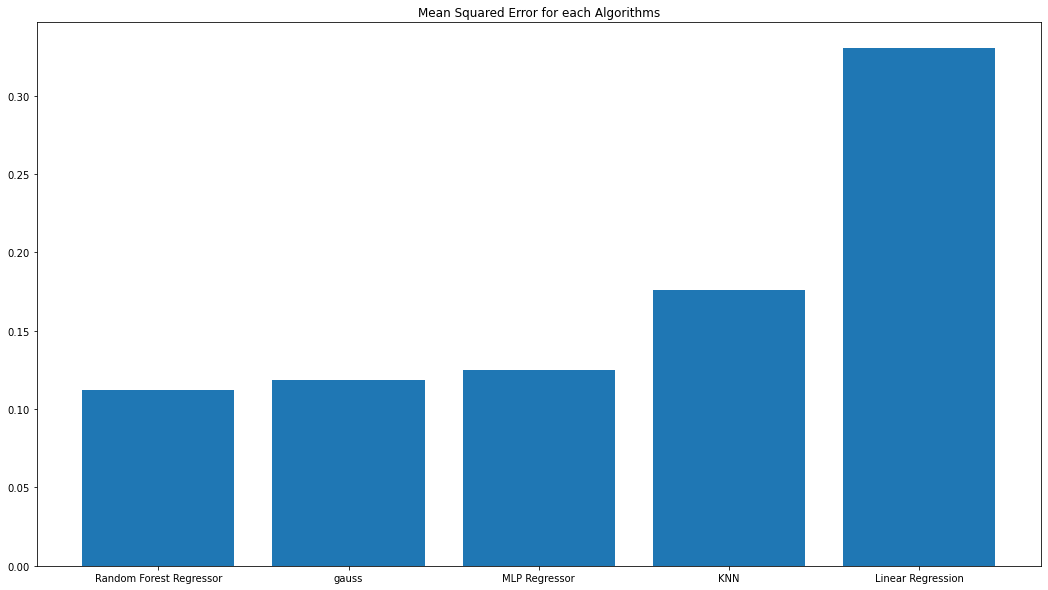

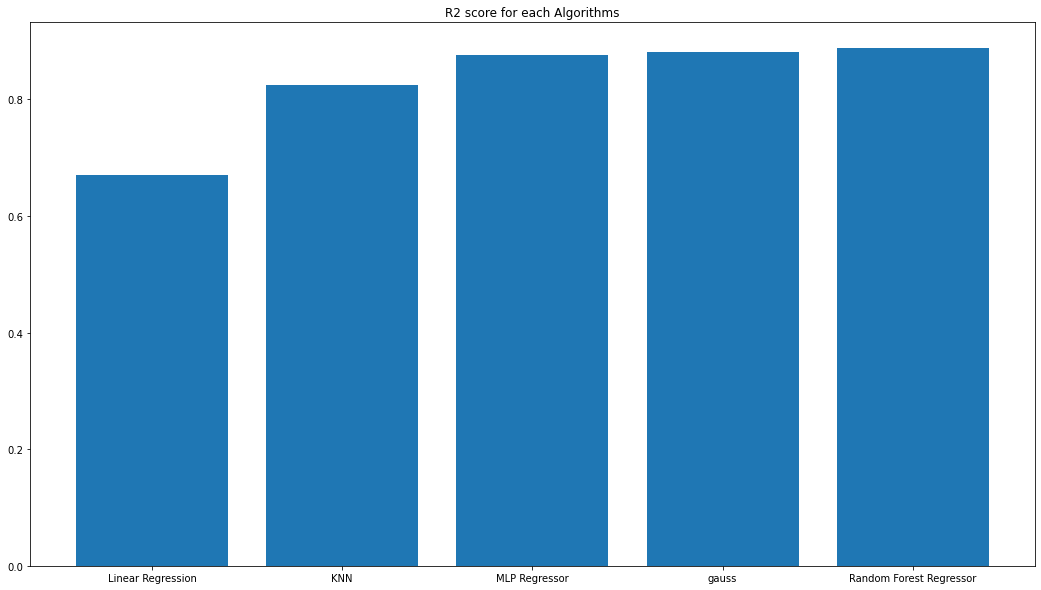

Random Forest Regressor
RandomForestRegressor(n_estimators=200, random_state=5)


In [29]:
sorted_values = sorted(mean_square.values()) # Sort the values
sorted_mse_dict = {}

for i in sorted_values:
    for k in mean_square.keys():
        if mean_square[k] == i:
            sorted_mse_dict[k] = mean_square[k]
            break
mean_square=sorted_mse_dict
names = list(mean_square.keys())
values = list(mean_square.values())

plt.figure(figsize=(18,10))
plt.title("Mean Squared Error for each Algorithms")
plt.bar(range(len(mean_square)), values, tick_label=names)
plt.show()

# lets try to visualise the algorithms based on their mse values


sorted_values = sorted(r2_value.values()) # Sort the values
sorted_r2_dict = {}

for i in sorted_values:
    for k in r2_value.keys():
        if r2_value[k] == i:
            sorted_r2_dict[k] = r2_value[k]
            break
r2_value=sorted_r2_dict
names = list(r2_value.keys())
values = list(r2_value.values())

plt.figure(figsize=(18,10))
plt.title("R2 score for each Algorithms")
plt.bar(range(len(r2_value)), values, tick_label=names)
plt.show()


Best_Algorithm = max(r2_value, key=r2_value.get)
print(Best_Algorithm)
Best_Model=Algorithms[Names.index(Best_Algorithm)]
print(Best_Model)

So the best model is Random Forest Regressor